In [51]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Hopper experiment

#### Performance analysis

xhopperStdWoNoiseAdptEnvVar2/S1.fit didn't exist


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'xhopperStdWoNoise'),
  Text(1, 0, 'xhopperStdWoNoiseAdptEnvVar'),
  Text(2, 0, 'xhopperStdWoNoiseAdptEnvVar2'),
  Text(3, 0, 'xhopperStdWithNoise'),
  Text(4, 0, 'xhopperStdWithMinNoise-0.9'),
  Text(5, 0, 'xhopperStdWithMinNoise-Adaptive'),
  Text(6, 0, 'xhopperStdWithMinNoise-Adaptive-AdaptVar')])

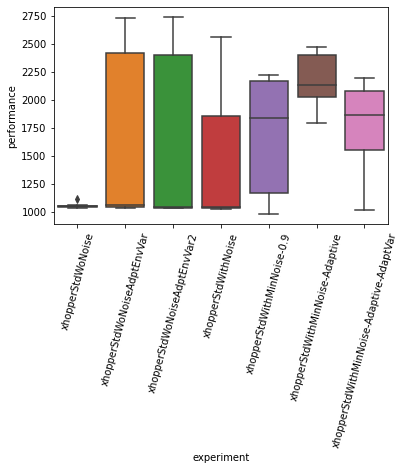

In [53]:
vStat = []
initSeed = 1
numSeed = 11
experiments = [
"xhopperStdWoNoise",
"xhopperStdWoNoiseAdptEnvVar",
"xhopperStdWoNoiseAdptEnvVar2",
"xhopperStdWithNoise",
#"xhopperStdWithMinNoise-1.5",
#"xhopperStdWithMinNoise-1.2",
"xhopperStdWithMinNoise-0.9",
"xhopperStdWithMinNoise-Adaptive",
"xhopperStdWithMinNoise-Adaptive-AdaptVar"
] #fill here the experiment

iev = []
cv = []

for experiment in experiments:
    for i in range(initSeed,numSeed):
        try:
            f = open(f"{experiment}/S{i}.fit", "r")
            vStat.append((experiment,i,float(f.read().split("bestgfit")[0].split("bestfit")[1].strip())))
        except:
            print(f"{experiment}/S{i}.fit didn't exist")            
            
        try:
            iev.append(np.load(f"{experiment}/S{i}.iev.npy", "r"))
            cv.append(np.load(f"{experiment}/S{i}.cv.npy", "r"))
        except:
            pass
            
#print(f"Average performance on {numSeed} seeds: {np.mean(vStat)} - Std deviation: {np.std(vStat)}")
df = pd.DataFrame(vStat,columns=['experiment','seed','performance'])
ax = sns.boxplot(x=df.experiment,y=df.performance)
plt.xticks(rotation=75)

In [60]:
for exp in experiments:
    print(f"Performance of experiment {exp} ({numSeed} seeds): {df[df['experiment']==exp]['performance'].mean()} +- {df[df['experiment']==exp]['performance'].std()}")

Performance of experiment xhopperStdWoNoise (11 seeds): 1055.084 +- 22.275256427006365
Performance of experiment xhopperStdWoNoiseAdptEnvVar (11 seeds): 1640.878 +- 770.9093546772467
Performance of experiment xhopperStdWoNoiseAdptEnvVar2 (11 seeds): 1539.6799999999998 +- 755.8590976002075
Performance of experiment xhopperStdWithNoise (11 seeds): 1498.959 +- 641.9654665764091
Performance of experiment xhopperStdWithMinNoise-0.9 (11 seeds): 1704.158 +- 526.6765211061193
Performance of experiment xhopperStdWithMinNoise-Adaptive (11 seeds): 2183.4839999999995 +- 227.52367448001735
Performance of experiment xhopperStdWithMinNoise-Adaptive-AdaptVar (11 seeds): 1793.5970000000002 +- 382.1937928459854


In [61]:
df[df['experiment']=='xhopperStdWoNoise']['performance'].mean()

1055.084

#### Noise Analysis - Standard Reward with PGN noise - no limitation

-- Loading data

In [5]:
seed = list(range(1,11))
motion = list(map(lambda x: x<5,seed))
noiseParameter = np.array([[-1.057036,-0.904793,-1.627683],
[-0.951210,-1.543393,-1.652689],
[-1.143012,-1.943825,-1.704224],
[-0.792456,-0.867625,-1.954244],
[-2.242359,-1.939327,-1.696721],
[-2.335426,-1.985879,-1.653965],
[-2.133642,-2.153280,-1.664309],
[-2.153533,-1.973502,-1.632281],
[-2.239090,-2.126331,-1.590877],
[-2.116482,-2.062976,-1.566676]])
noise0,noise1,noise2 = np.split(noiseParameter,3,axis=1)
data = zip(seed,motion,list(map(float,noise0)),list(map(float,noise1)),list(map(float,noise2)))
df = pd.DataFrame(data,columns=['seed','motion','noise0','noise1','noise2'])

**Ploting and Clustering**

Text(0, 0.5, 'noise1')

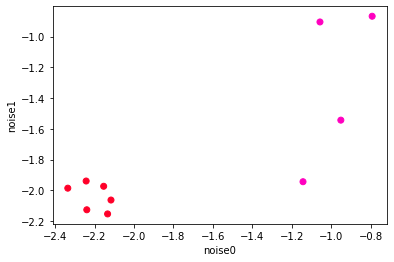

In [6]:
plt.scatter(df.iloc[:,2], df.iloc[:,3], c=df['motion'], cmap='gist_rainbow')
plt.xlabel('noise0')
plt.ylabel('noise1')

In [7]:
# importando e instanciando o modelo com valor pré-definido de k
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 2, random_state=1)

#treinando apenas com dois atributos
kmean.fit(df[['noise0','noise1']])
centers = kmean.cluster_centers_

Text(0.5, 1.0, 'Predicted')

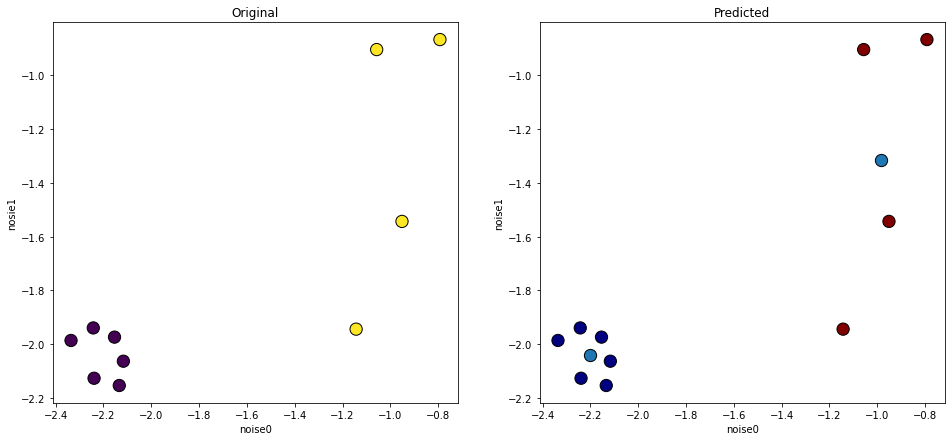

In [8]:
new_labels = kmean.labels_
# Plot the identified clusters and compare
fig, axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].scatter(df.iloc[:,2], df.iloc[:,3], c=df['motion'], edgecolor='k', s=150)
axes[1].scatter(df.iloc[:,2], df.iloc[:,3], c=new_labels, cmap='jet', edgecolor='k', s=150)
axes[1].scatter(centers[:, 0], centers[:, 1], edgecolor='k', s=150)
axes[0].set_xlabel('noise0')
axes[0].set_ylabel('nosie1')
axes[1].set_xlabel('noise0')
axes[1].set_ylabel('noise1')
axes[0].set_title('Original')
axes[1].set_title('Predicted')

In [94]:
df[df['experiment']=='xhopperStdWoNoiseAdptEnvVar2']

,experiment,seed,performance
20,xhopperStdWoNoiseAdptEnvVar2,2,1038.14
21,xhopperStdWoNoiseAdptEnvVar2,3,1039.26
22,xhopperStdWoNoiseAdptEnvVar2,4,2741.14
23,xhopperStdWoNoiseAdptEnvVar2,5,1041.84
24,xhopperStdWoNoiseAdptEnvVar2,6,1038.37
25,xhopperStdWoNoiseAdptEnvVar2,7,2399.23
26,xhopperStdWoNoiseAdptEnvVar2,8,1039.96
27,xhopperStdWoNoiseAdptEnvVar2,9,1038.24
28,xhopperStdWoNoiseAdptEnvVar2,10,2480.94


In [111]:
iev_cv_df = pd.DataFrame()
for i in range(10):    
    size = len(cv[i])
    iev_cv_df = pd.concat([iev_cv_df,pd.DataFrame({'seed':np.ones(size)*(i+1),'step':list(range(size)),'iev':list(iev[i])[:size],'cv':list(cv[i])})])

In [112]:
iev_cv_df[iev_cv_df['seed']==1]

,seed,step,iev,cv
0,1.0,0,0.112821,0.041650
1,1.0,1,0.306410,0.133481
2,1.0,2,0.317949,0.142600
3,1.0,3,0.387179,0.193106
4,1.0,4,0.389744,0.193418
...,...,...,...,...
181,1.0,181,0.347436,0.148018
182,1.0,182,0.382051,0.205595
183,1.0,183,0.392308,0.141458
184,1.0,184,0.357692,0.162136


4 2
10 9
7 6


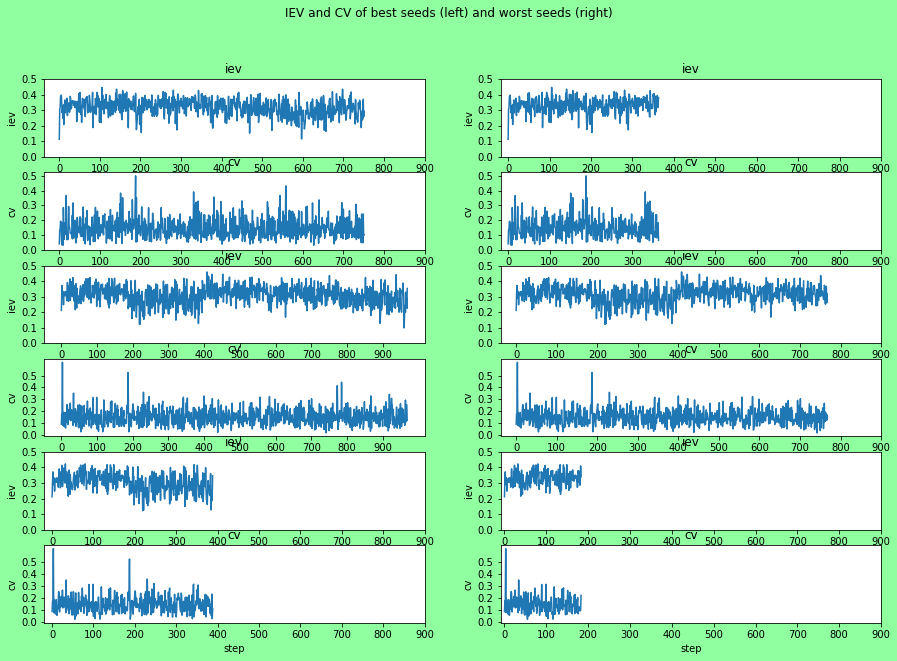

In [147]:
seed_best = [4,10,7];
seed_worst = [2,9,6];

fig, axes = plt.subplots(6,2,figsize=(15,10))
fig.suptitle('IEV and CV of best seeds (left) and worst seeds (right)')
fig.patch.set_facecolor('xkcd:mint green')

for i, seed in enumerate(zip(seed_best,seed_worst)):
    print(seed[0],seed[1])
    g = sns.lineplot(data=iev_cv_df[iev_cv_df['seed']==seed[0]],x='step',y='iev',ax=axes[i*2,0])
    g.set_xticks(range(0,1000,100))
    g.set_yticks(np.arange(0,0.6,0.1))
    axes[i*2,0].set_title('iev')
    #axes[i*2,0].xticks(len(range(1000)),range(1000))

    g=sns.lineplot(data=iev_cv_df[iev_cv_df['seed']==seed[0]],x='step',y='cv',ax=axes[i*2+1,0])
    g.set_xticks(range(0,1000,100))
    g.set_yticks(np.arange(0,0.6,0.1))
    axes[i*2+1,0].set_title('cv')

    #axes[i*2+1,0].xticks(len(range(1000)),range(1000))

    g=sns.lineplot(data=iev_cv_df[iev_cv_df['seed']==seed[1]],x='step',y='iev',ax=axes[i*2,1])
    g.set_xticks(range(0,1000,100))
    g.set_yticks(np.arange(0,0.6,0.1))
    axes[i*2,1].set_title('iev')

    #axes[i*2,1].xticks(len(range(1000)),range(1000))

    g=sns.lineplot(data=iev_cv_df[iev_cv_df['seed']==seed[1]],x='step',y='cv',ax=axes[i*2+1,1])
    g.set_xticks(range(0,1000,100))
    g.set_yticks(np.arange(0,0.6,0.1))
    axes[i*2+1,1].set_title('cv')
    

    #axes[i*2+1,1].xticks(len(range(1000)),range(1000))

In [150]:
iev_cv_df[iev_cv_df['seed']==4]

,seed,step,iev,cv
0,4.0,0,0.112821,0.041650
1,4.0,1,0.306410,0.133481
2,4.0,2,0.317949,0.142600
3,4.0,3,0.387179,0.193106
4,4.0,4,0.389744,0.193418
...,...,...,...,...
747,4.0,747,0.238462,0.215682
748,4.0,748,0.250000,0.048096
749,4.0,749,0.370513,0.242389
750,4.0,750,0.257692,0.098455


In [151]:
iev_cv_df[iev_cv_df['seed']==2]

,seed,step,iev,cv
0,2.0,0,0.112821,0.041650
1,2.0,1,0.306410,0.133481
2,2.0,2,0.317949,0.142600
3,2.0,3,0.387179,0.193106
4,2.0,4,0.389744,0.193418
...,...,...,...,...
359,2.0,359,0.324359,0.081453
360,2.0,360,0.394872,0.159874
361,2.0,361,0.316667,0.153162
362,2.0,362,0.341026,0.183179


In [178]:
iev[0][:100]==iev[1][:100]
print(len(iev[1]))

366
